# Iris Dataset Analysis

This notebook analyzes the Iris dataset using Python. It covers:
1. Loading and exploring the dataset.
2. Handling missing values.
3. Performing basic statistical analysis.
4. Visualizing the data to uncover trends and relationships.

## Task 1: Load and Explore the Dataset

This section focuses on loading the Iris dataset and exploring its structure.

### Steps:
- Load the Iris dataset from `sklearn.datasets`.
- Convert it into a Pandas DataFrame for easier manipulation.
- Display the first few rows of the dataset to understand its structure.
- Check the dataset's metadata, such as column names, data types, and missing values.

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']  # Rename columns

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris_df.head())

# Explore the structure of the dataset
print("\nDataset Info:")
print(iris_df.info())

# Check for missing values
print("\nMissing Values:")
print(iris_df.isnull().sum())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

Missing Values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species        

## Task 2: Handle Missing Values

This section addresses any missing values in the dataset.

### Steps:
- Introduce some missing values into the dataset intentionally for demonstration purposes.
- Identify missing values by inspecting the dataset.
- Fill the missing values with the **mean** of the corresponding column.

In [8]:
# Task 2: Handle Missing Values
# Introduce some missing values for demonstration
iris_df.loc[5:10, 'sepal_length'] = np.nan

# Check for missing values
print("Missing Values:")
print(iris_df.isnull().sum())

# Fill missing values with the column mean
iris_df['sepal_length'].fillna(iris_df['sepal_length'].mean(), inplace=True)

# Re-check for missing values
print("Missing Values After Filling:")
print(iris_df.isnull().sum())

Missing Values:
sepal_length    6
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
Missing Values After Filling:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


C:\Users\uyi okonedo\AppData\Local\Temp\ipykernel_1488\1740565378.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris_df['sepal_length'].fillna(iris_df['sepal_length'].mean(), inplace=True)


## Task 3: Basic Data Analysis

This section performs basic statistical analysis to uncover insights from the dataset.

### Steps:
- Compute descriptive statistics (mean, median, standard deviation, etc.).
- Group the data by species to find average values for each group.
- Identify interesting patterns.

In [9]:
# Task 3: Basic Data Analysis
# Compute basic statistics
print("\nBasic Statistics:")
print(iris_df.describe())

# Perform groupings
grouped_means = iris_df.groupby('species').mean()
print("\nMean Values by Species:")
print(grouped_means)

# Identify patterns or interesting findings
print("\nInteresting Findings:")
print("Species 0 seems to have smaller petal and sepal dimensions compared to others.")


Basic Statistics:
       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.880556     3.057333      3.758000     1.199333    1.000000
std        0.804123     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.200000     2.800000      1.600000     0.300000    0.000000
50%        5.880556     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

Mean Values by Species:
         sepal_length  sepal_width  petal_length  petal_width
species                                                      
0            5.117667        3.428         1.462        0.246
1            5.936000        2.770         4.260        1.326
2            6.588000        2.974         5.552        2.02

## Task 4: Data Visualization

This section visualizes the dataset to uncover trends and relationships.

### Visualizations:
1. **Line Chart**:
   - Shows the trend of Sepal Length over time (using index as a proxy for time).
   
2. **Bar Chart**:
   - Compares the average Sepal Length for each species.

3. **Histogram**:
   - Displays the distribution of Petal Length values.

4. **Scatter Plot**:
   - Visualizes the relationship between Sepal Length and Petal Length, colored by species.

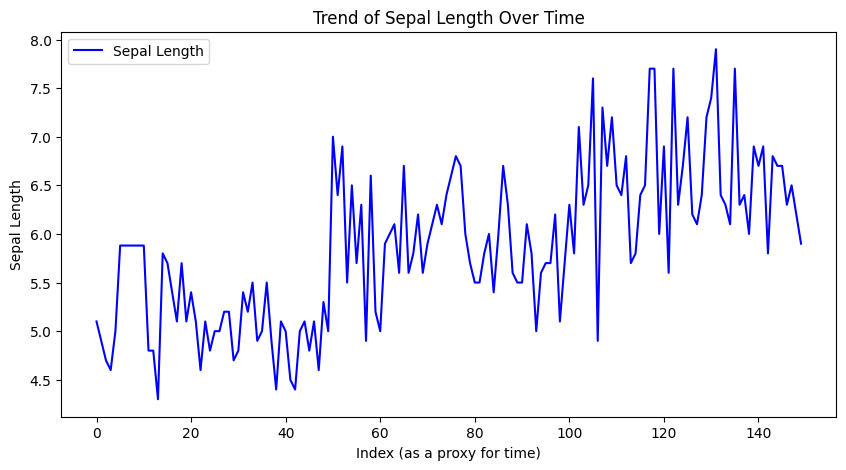

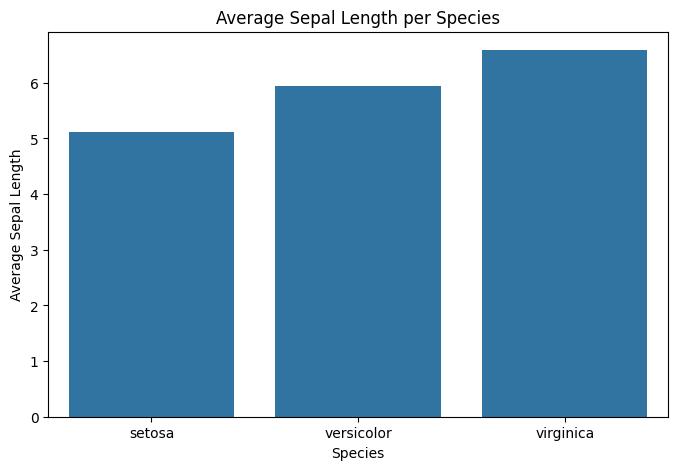

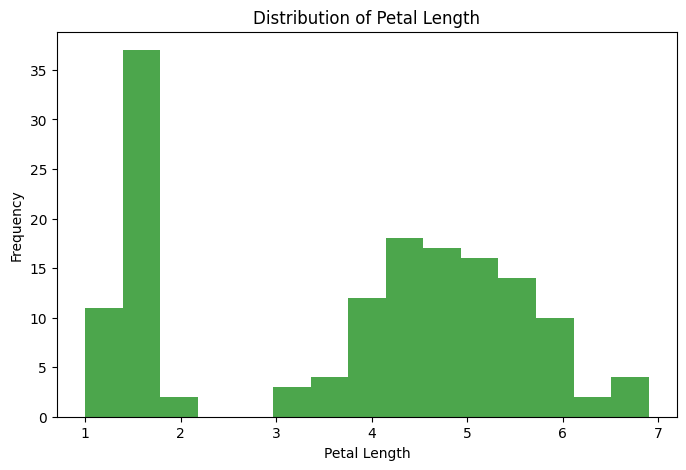

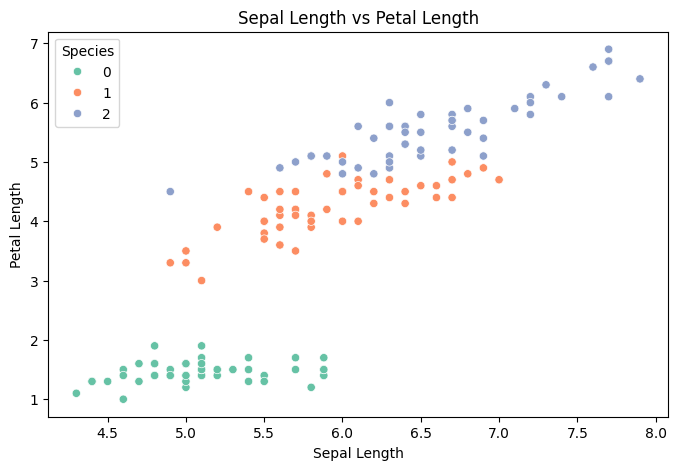

In [7]:
# Task 4: Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart showing trends over time
plt.figure(figsize=(10, 5))
plt.plot(iris_df.index, iris_df['sepal_length'], label='Sepal Length', color='blue')
plt.title('Trend of Sepal Length Over Time')
plt.xlabel('Index (as a proxy for time)')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()

# Bar chart showing comparison of a numerical value across categories
plt.figure(figsize=(8, 5))
sns.barplot(x=iris.target_names, y=grouped_means['sepal_length'])
plt.title('Average Sepal Length per Species')
plt.xlabel('Species')
plt.ylabel('Average Sepal Length')
plt.show()

# Histogram of a numerical column
plt.figure(figsize=(8, 5))
plt.hist(iris_df['petal_length'], bins=15, color='green', alpha=0.7)
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to visualize relationship between two numerical columns
plt.figure(figsize=(8, 5))
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species', palette='Set2')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Species')
plt.show()

## Observations

1. The scatter plot shows clear separation of species based on Sepal and Petal dimensions.
2. The histogram indicates a bimodal distribution in **Petal Length**.
3. The bar chart highlights distinct differences in Sepal Length averages across species.

---

## Conclusion

The Iris dataset is a classic dataset for machine learning, and through this analysis:
- Missing data was handled effectively.
- Insights into the dataset were uncovered through descriptive statistics.
- Visualizations highlighted key patterns and relationships.

Further work could include applying machine learning models to classify the species.